In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.shape

(1338, 7)

In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.corr()

C:\Users\mahalakshmi\AppData\Local\Temp\ipykernel_7580\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [10]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
print(df['sex'].value_counts().sort_values()) 
print(df['smoker'].value_counts().sort_values())
print(df['region'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
yes     274
no     1064
Name: smoker, dtype: int64
northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64


# EDA

<Axes: xlabel='smoker', ylabel='charges'>

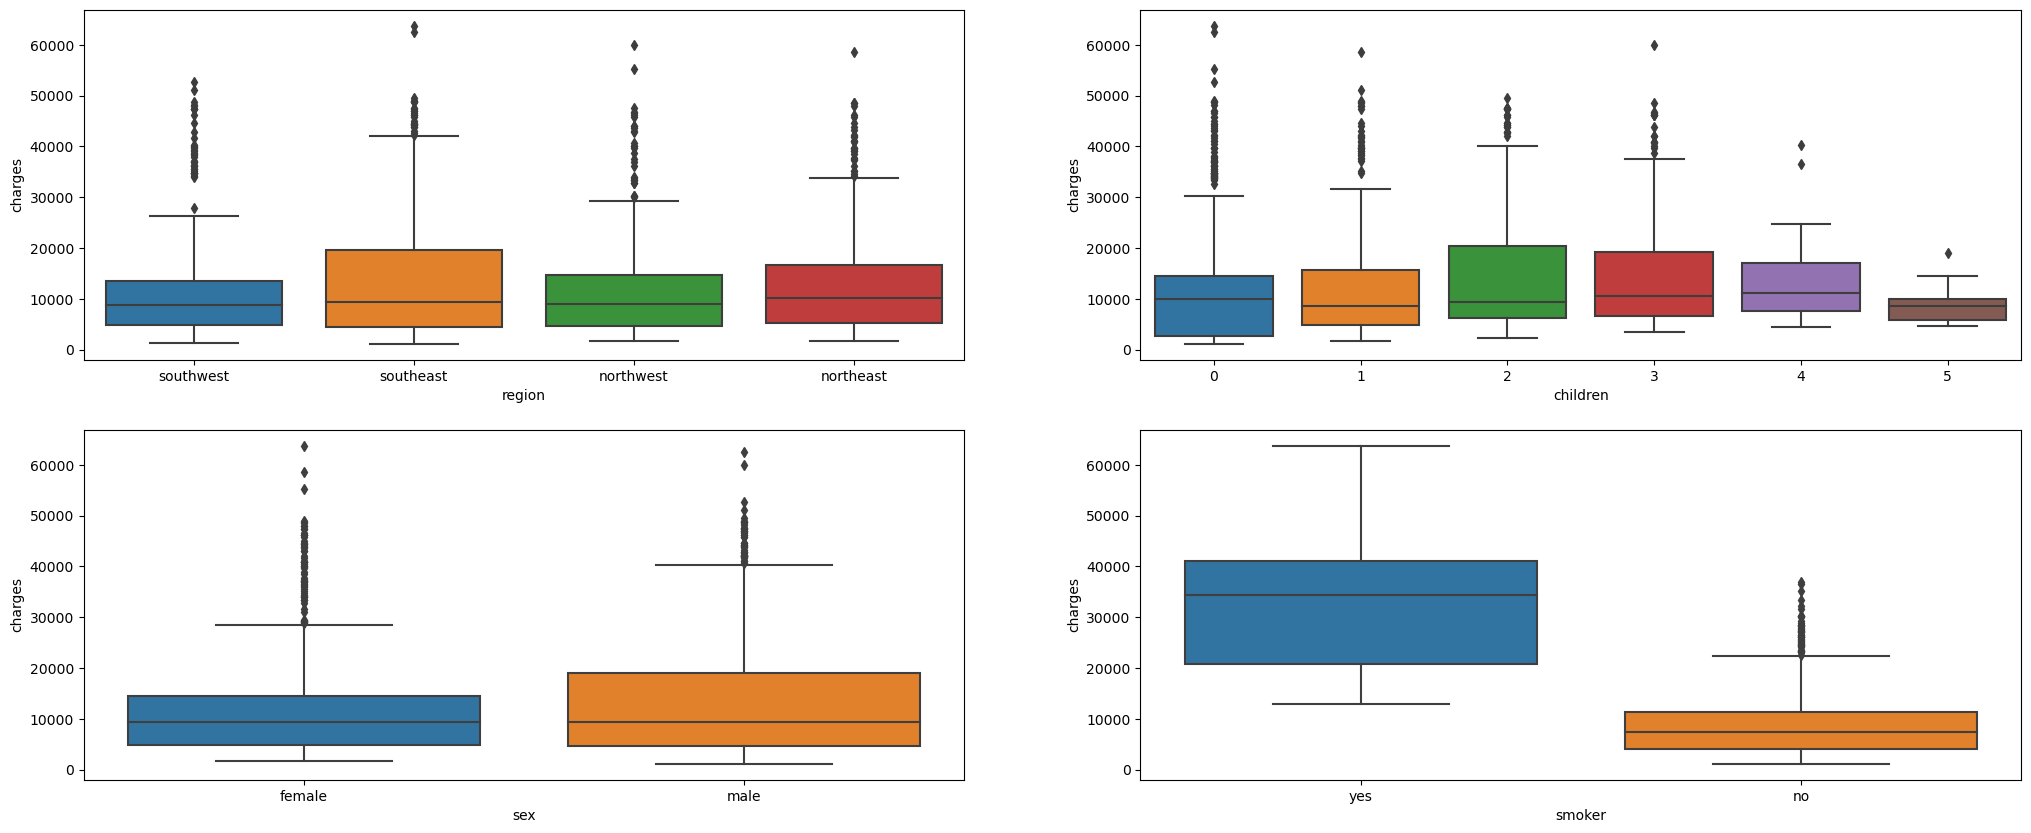

In [12]:
plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = df)

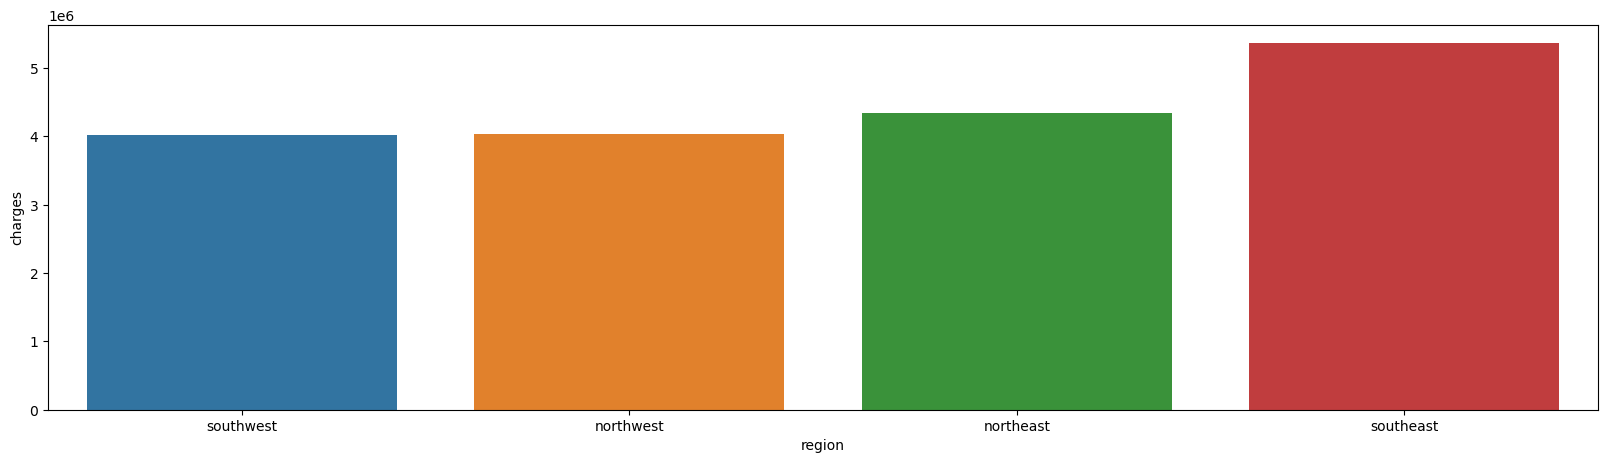

In [13]:
charges = df['charges'].groupby(df.region).sum().sort_values()
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

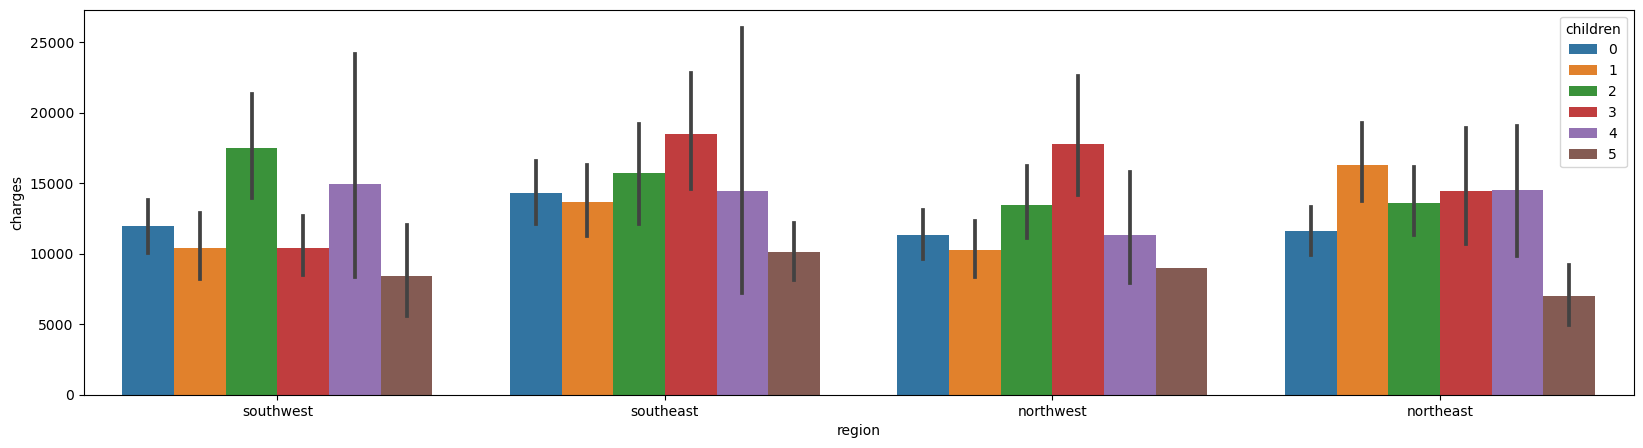

In [14]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df)

<Axes: xlabel='region', ylabel='charges'>

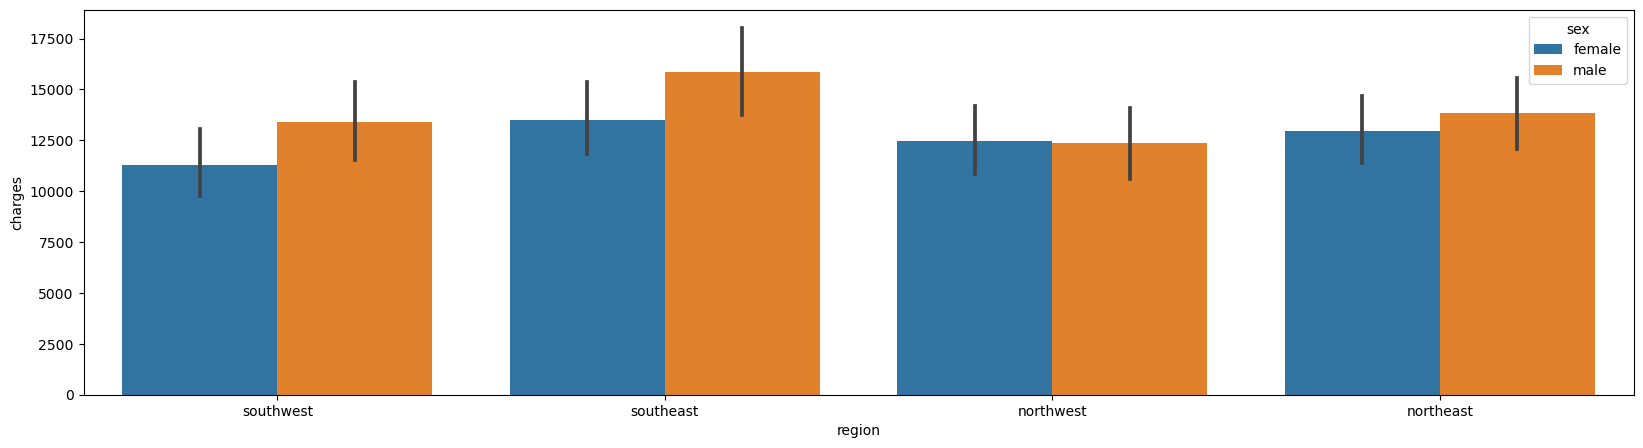

In [15]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df)

<Axes: xlabel='region', ylabel='charges'>

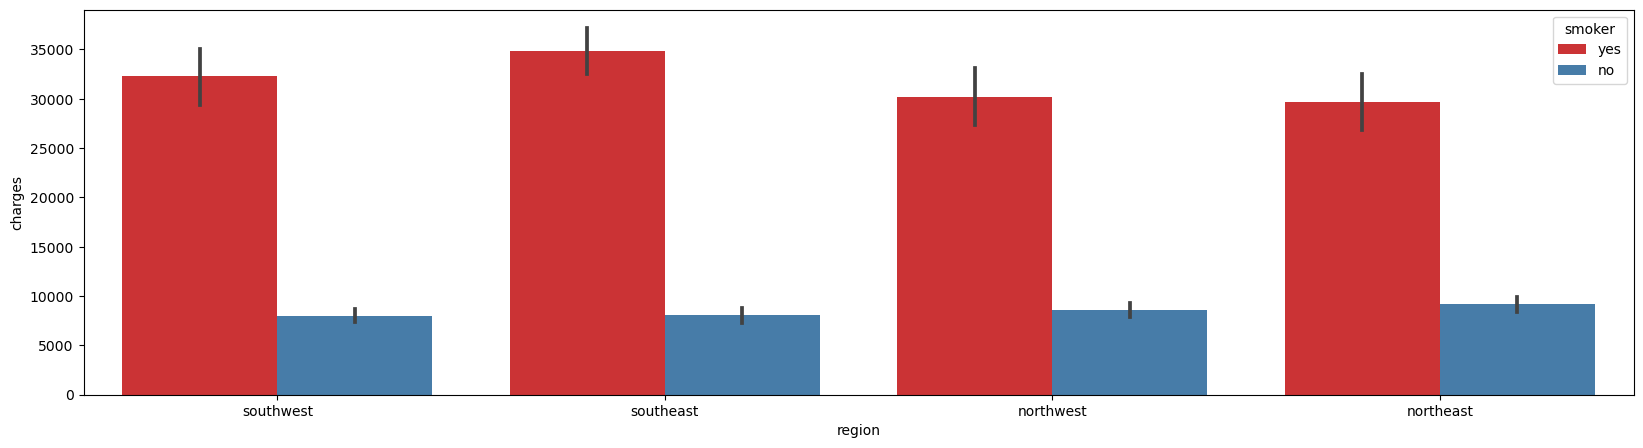

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Set1')

Text(4.944444444444445, 0.5, 'Count')

<Figure size 1000x700 with 0 Axes>

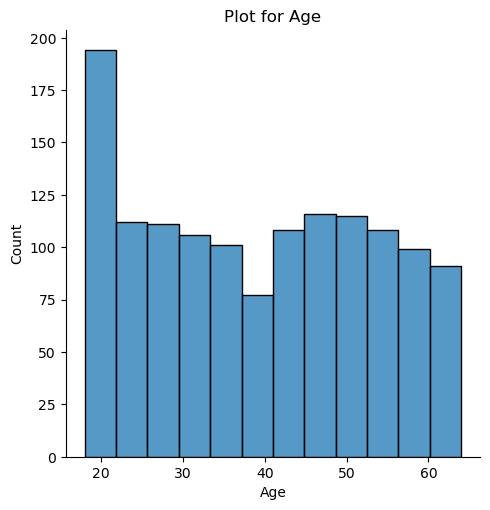

In [17]:
plt.figure(figsize=(10,7))
sns.displot(df['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(4.944444444444445, 0.5, 'Count')

<Figure size 1000x700 with 0 Axes>

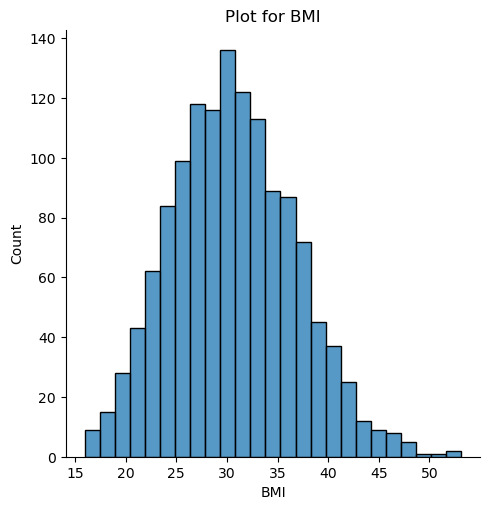

In [18]:
plt.figure(figsize=(10,7))
sns.displot(df['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(4.944444444444445, 0.5, 'Count')

<Figure size 1000x700 with 0 Axes>

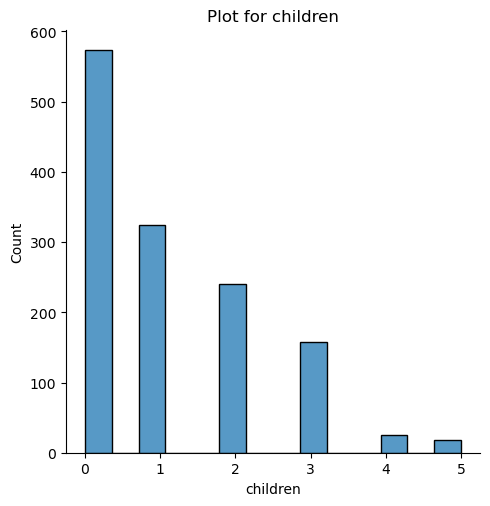

In [83]:
plt.figure(figsize=(10,7))
sns.displot(df['children'])
plt.title('Plot for children')
plt.xlabel('children')
plt.ylabel('Count')

Text(4.944444444444445, 0.5, 'Count')

<Figure size 1000x700 with 0 Axes>

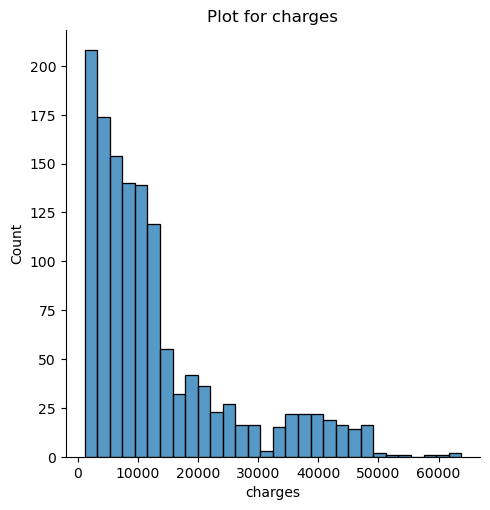

In [84]:
plt.figure(figsize=(10,7))
sns.displot(df['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

# Train-Test Split

In [21]:
X = df[['age', 'sex', 'bmi', 'children','smoker','region']]

y = df['charges']

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)

In [23]:
print(X_train.shape)
print(X_test.shape)

(1003, 6)
(335, 6)


In [24]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [25]:
X_train_cat = X_train.select_dtypes(include=["object"])
X_train_num = X_train.select_dtypes(include=["float64","int64"])

In [26]:
X_train_cat.head()

,sex,smoker,region
1146,male,yes,southwest
691,male,no,southwest
1244,male,no,southeast
414,female,no,northwest
1144,male,no,southwest


In [27]:
X_train_num.head()

,age,bmi,children
1146,60,32.80,0
691,47,36.20,1
1244,18,33.33,0
414,19,35.15,0
1144,50,32.30,2


# Preprocessing

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,age,bmi,children
1146,1.477571,0.334893,-0.922069
691,0.556059,0.907018,-0.079010
1244,-1.499621,0.424077,-0.922069
414,-1.428735,0.730332,-0.922069
1144,0.768715,0.250757,0.764048


In [29]:
X_train_num_transformed.describe()

,age,bmi,children
count,1.003000e+03,1.003000e+03,1.003000e+03
mean,1.345993e-16,2.975353e-16,-3.364983e-17
std,1.000499e+00,1.000499e+00,1.000499e+00
min,-1.499621e+00,-2.275005e+00,-9.220688e-01
25%,-9.325366e-01,-7.403646e-01,-9.220688e-01
50%,-1.102506e-02,-5.213242e-02,-7.901046e-02
75%,8.396010e-01,6.663887e-01,7.640479e-01
max,1.761113e+00,3.755861e+00,3.293223e+00


In [30]:
X_train_num_transformed.corr()

,age,bmi,children
age,1.000000,0.117983,0.085642
bmi,0.117983,1.000000,0.038813
children,0.085642,0.038813,1.000000


In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)
X_train_cat_transformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_transformed.shape)

X_train_cat_transformed.head()

Shape of Data before Transformation: (1003, 3)
Shape of Data after Transformation: (1003, 8)


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1146,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
691,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1244,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
414,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1144,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [32]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['sex' 'smoker' 'region']
Unique Categories: [array(['female', 'male'], dtype=object), array(['no', 'yes'], dtype=object), array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]
Feature Names after encoding: ['sex_female' 'sex_male' 'smoker_no' 'smoker_yes' 'region_northeast'
 'region_northwest' 'region_southeast' 'region_southwest']


In [33]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1146,1.477571,0.334893,-0.922069,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
691,0.556059,0.907018,-0.079010,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1244,-1.499621,0.424077,-0.922069,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
414,-1.428735,0.730332,-0.922069,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1144,0.768715,0.250757,0.764048,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [34]:
X_test.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [35]:
X_test_cat = X_test.select_dtypes(include=["object"])
X_test_num = X_test.select_dtypes(include=["float64","int64"])

In [36]:
X_test_cat.head()

,sex,smoker,region
440,female,no,northwest
1202,male,no,northwest
820,male,no,southwest
730,male,yes,southeast
78,female,no,northeast


In [37]:
X_test_num.head()

,age,bmi,children
440,31,32.680,1
1202,22,32.110,0
820,45,33.700,1
730,35,24.420,3
78,22,39.805,0


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test_num_transformed = pd.DataFrame(scaler.fit_transform(X_test_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_test_num.index)

X_test_num_transformed.head()

,age,bmi,children
440,-0.603496,0.376913,-0.078188
1202,-1.253099,0.289401,-0.871911
820,0.406999,0.533515,-0.078188
730,-0.314783,-0.891251,1.509258
78,-1.253099,1.470820,-0.871911


In [39]:
X_test_num_transformed.describe()

,age,bmi,children
count,3.350000e+02,3.350000e+02,3.350000e+02
mean,2.014972e-16,-3.340611e-16,1.325639e-17
std,1.001496e+00,1.001496e+00,1.001496e+00
min,-1.541812e+00,-2.190121e+00,-8.719106e-01
25%,-8.922082e-01,-6.870548e-01,-8.719106e-01
50%,-2.607032e-02,-3.454901e-02,-7.818764e-02
75%,9.122457e-01,6.371481e-01,7.155354e-01
max,1.778384e+00,3.094408e+00,3.096704e+00


In [40]:
X_test_num_transformed.corr()

,age,bmi,children
age,1.000000,0.086891,-0.081389
bmi,0.086891,1.000000,-0.053948
children,-0.081389,-0.053948,1.000000


In [41]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)
X_test_cat_transformed = pd.DataFrame(encoder_.fit_transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_test_cat.index)

print("Shape of Data before Transformation:", X_test_cat.shape)
print("Shape of Data after Transformation:", X_test_cat_transformed.shape)

X_test_cat_transformed.head()

Shape of Data before Transformation: (335, 3)
Shape of Data after Transformation: (335, 8)


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
440,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1202,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
820,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
730,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
78,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [42]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['sex' 'smoker' 'region']
Unique Categories: [array(['female', 'male'], dtype=object), array(['no', 'yes'], dtype=object), array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]
Feature Names after encoding: ['sex_female' 'sex_male' 'smoker_no' 'smoker_yes' 'region_northeast'
 'region_northwest' 'region_southeast' 'region_southwest']


In [43]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
440,-0.603496,0.376913,-0.078188,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1202,-1.253099,0.289401,-0.871911,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
820,0.406999,0.533515,-0.078188,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
730,-0.314783,-0.891251,1.509258,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
78,-1.253099,1.470820,-0.871911,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

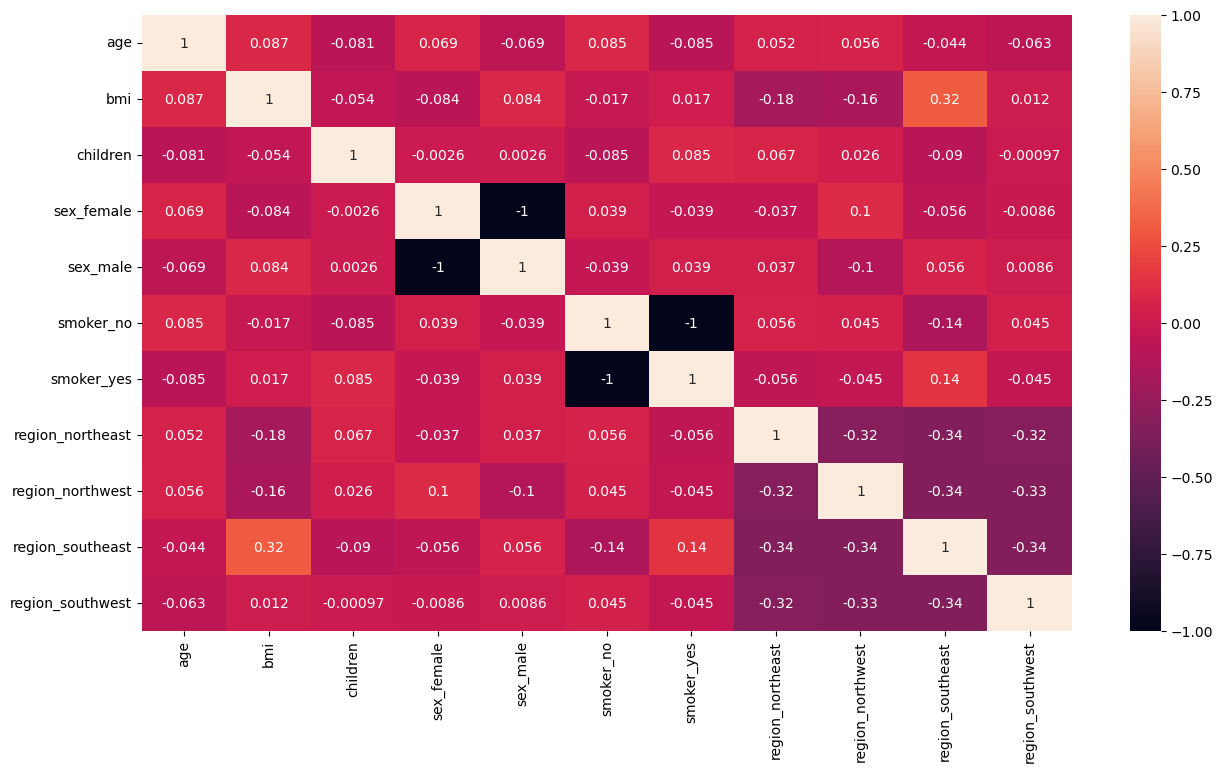

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(X_test_transformed.corr(), annot = True)

# ML Models

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

KN_regressor = KNeighborsRegressor()
KN_regressorssor.fit(X_train_transformed, y_train)

y_test_pred_KN = KN_regressor.predict(X_test_transformed)

KNN = metrics.mean_absolute_error(y_test, y_test_pred_KN)
print("KNN MAE: ",KNN)
print("KNN Score: ",KN_regressor.score(X_test_transformed,y_test))

KNN MAE:  3489.667112900895
KNN Score:  0.7482754775206663


Text(0, 0.5, 'Predicted Y')

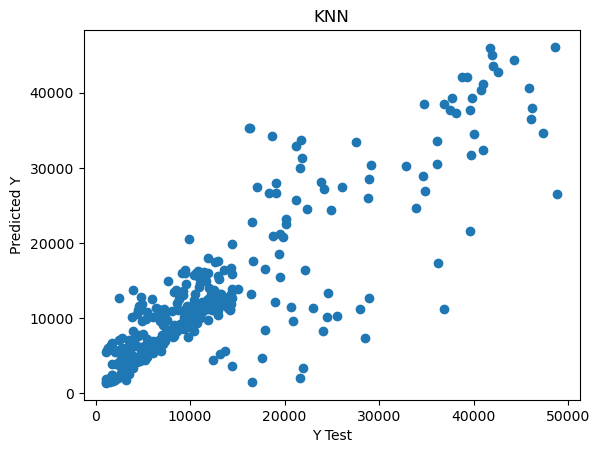

In [81]:
plt.scatter(y_test,y_test_pred_KN)
plt.title('KNN')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

L_regressor = LinearRegression()
L_regressor.fit(X_train_transformed,y_train)

y_test_pred_L = L_regressor.predict(X_test_transformed)

LR = metrics.mean_absolute_error(y_test, y_test_pred_L)
print("LinearR MAE: ",LR)
print("LinearR Score: ",L_regressor.score(X_test_transformed,y_test))

LinearR MAE:  3962.9552997974456
LinearR Score:  0.7463424300834445


Text(0, 0.5, 'Predicted Y')

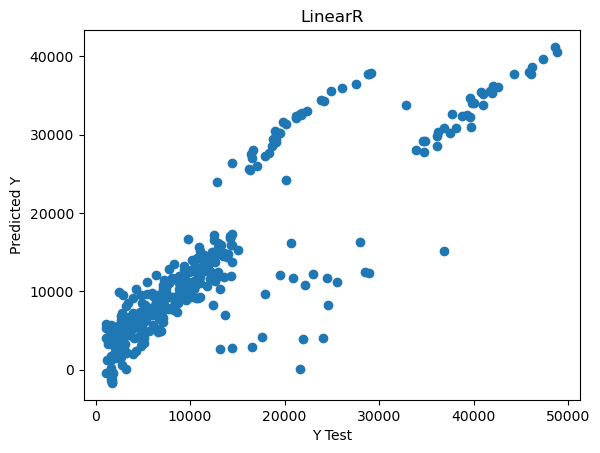

In [49]:
plt.scatter(y_test,y_test_pred)
plt.title('LinearR')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train_transformed, y_train)

y_test_pred_DT = DT_regressor.predict(X_test_transformed)

DT = metrics.mean_absolute_error(y_test, y_test_pred_DT)
print("DecisionTree MAE: ",DT)
print("DecisionTree Score: ",DT_regressor.score(X_test_transformed,y_test))

DecisionTree MAE:  3033.014578564179
DecisionTree Score:  0.6752321149203951


Text(0, 0.5, 'Predicted Y')

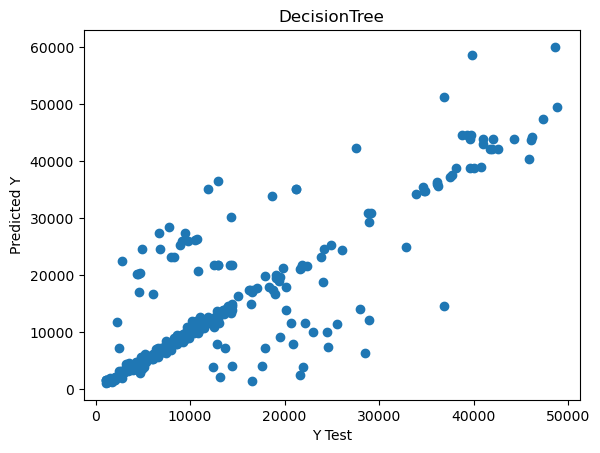

In [51]:
plt.scatter(y_test,y_test_pred)
plt.title('DecisionTree')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

RF_regressor = RandomForestRegressor()
RF_regressor.fit(X_train_transformed, y_train)

y_test_pred_RF = RF_regressor.predict(X_test_transformed)

RF = metrics.mean_absolute_error(y_test, y_test_pred_RF)
print("RandomForest MAE: ",RF)
print("RandomForest Score: ",RF_regressor.score(X_test_transformed,y_test))

RandomForest MAE:  2558.2412175610993
RandomForest Score:  0.8275096054206718


Text(0, 0.5, 'Predicted Y')

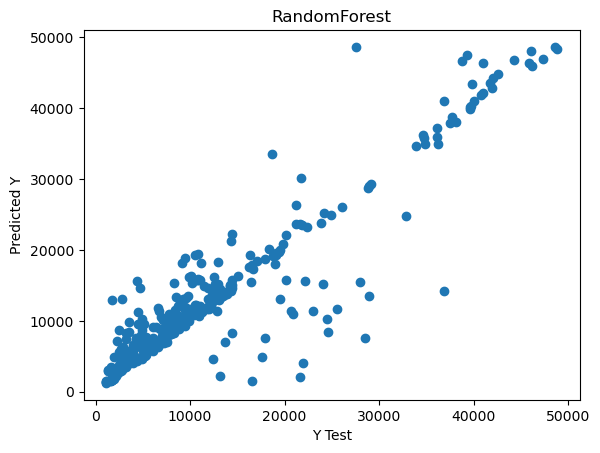

In [53]:
plt.scatter(y_test,y_test_pred)
plt.title('RandomForest')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [69]:
from sklearn.svm import SVR
from sklearn import metrics

SVM_regressor = SVR(kernel = 'linear',gamma = 'scale', C = 1)
SVM_regressor.fit(X_train_transformed, y_train)

y_test_pred_SVM = SVM_regressor.predict(X_test_transformed)

SVM = metrics.mean_absolute_error(y_test, y_test_pred_SVM)
print("SVM MAE: ",SVM)
print("SVM Score: ",SVM_regressor.score(X_test_transformed,y_test))

SVM MAE:  7365.924994865688
SVM Score:  -0.05912432880089513


Text(0, 0.5, 'Predicted Y')

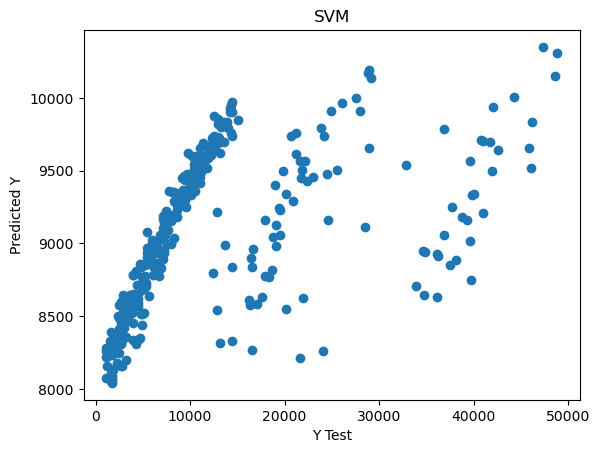

In [55]:
plt.scatter(y_test,y_test_pred)
plt.title('SVM')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [70]:
models = [('KNeighborsRegressor', KNN, KN_regressor.score(X_test_transformed,y_test)),
          ('Linear Regression', LR, L_regressor.score(X_test_transformed,y_test)),
          ('DecisionTreeRegressor', DT, DT_regressor.score(X_test_transformed,y_test)),
          ('Random Forest Regression', RF, RF_regressor.score(X_test_transformed,y_test)),
          ('Support Vector Regression', SVM, SVM_regressor.score(X_test_transformed,y_test))
         ]

In [71]:
Model_Data = pd.DataFrame(data = models, columns = ['Model', 'MAE', 'Score'])

In [72]:
Model_Data

,Model,MAE,Score
0,KNeighborsRegressor,3489.667113,0.748275
1,Linear Regression,3962.955300,0.746342
2,DecisionTreeRegressor,3033.014579,0.675232
3,Random Forest Regression,2558.241218,0.827510
4,Support Vector Regression,7365.924995,-0.059124


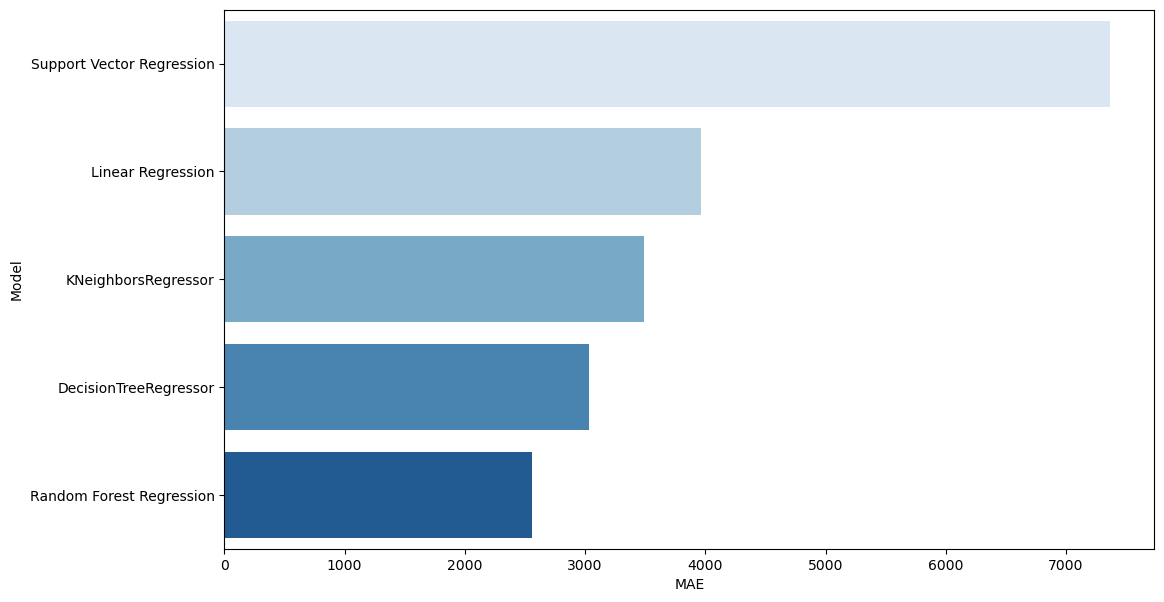

In [74]:
plt.figure(figsize=(12,7))
Model_Data.sort_values(by=['MAE'], ascending=False, inplace=True)

sns.barplot(x='MAE', y='Model',data = Model_Data, palette='Blues')
plt.xlabel('MAE')
plt.ylabel('Model')
plt.show()

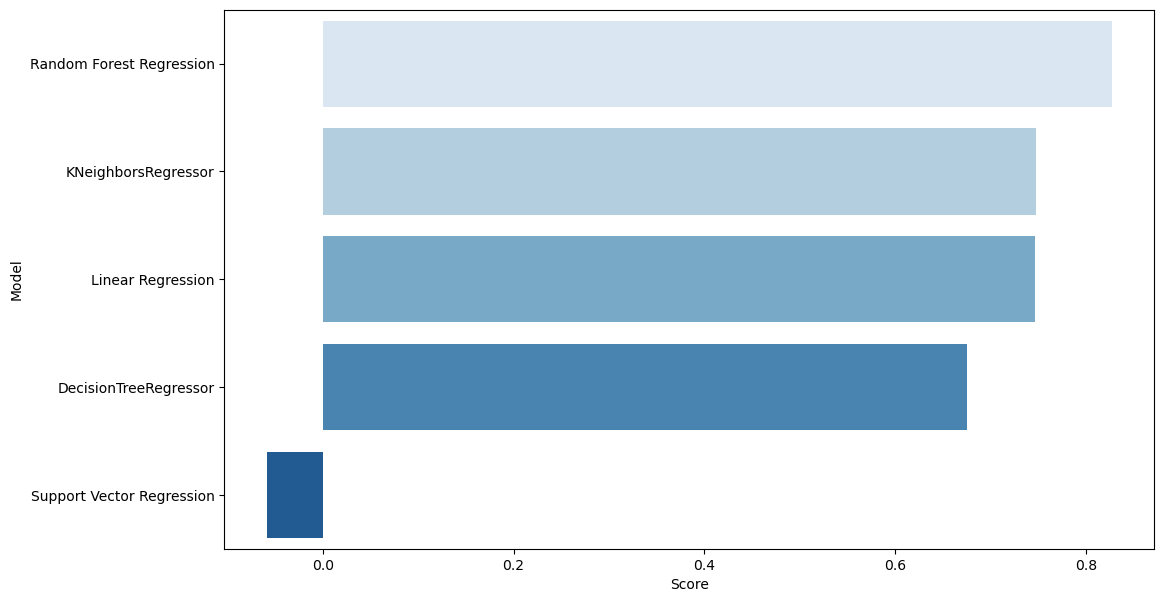

In [75]:
plt.figure(figsize=(12,7))
Model_Data.sort_values(by=['Score'], ascending=False, inplace=True)

sns.barplot(x='Score', y='Model',data = Model_Data, palette='Blues')
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()